## Find a data set and build a KNN Regression and an OLS regression. 
## Compare the two. How similar are they? Do they miss in different ways?

Create a Jupyter notebook with your models. At the end in a markdown cell write a few paragraphs 
to describe the models' behaviors and why you favor one model or the other. Try to determine 
whether there is a situation where you would change your mind, or whether one is unambiguously 
better than the other. Lastly, try to note what it is about the data that causes the better model 
to outperform the weaker model. Submit a link to your notebook below.


In [18]:
import numpy as np
import pandas as pd
import seaborn as sbn
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn import neighbors
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
# import dataset
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit OLS linear regression model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV']]
regr.fit(X, Y)


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Coefficients: 
 [[0.04753664]]
Intercept: 
 [7.03259355]


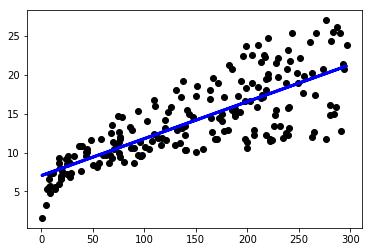

In [20]:
# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# Plot outputs
plt.scatter(X, Y, color='black')
plt.plot(X, regr.predict(X), color='blue', linewidth=3)
plt.show()

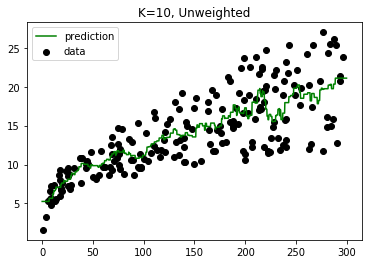

In [21]:
# fit to KNN KNeighborsRegressor model
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 300, 0.25)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()


# Above, we create two models for one dataset. OLS model captures the main
# feature of the dataset, and is simple. KNN captures more details of dataset.

I like OLS model better than KNN, because OLS is simple and captures the dominant feature of the dataset.

If the dataset is changed to have uneven distributions above and below the linear fit line, KNN model will capture
the detailed distribution better.